## 🧠 Simulating BOLD Responses to Dietary Sugars

This section models the **immediate neural responses** in three brain regions—**VTA (reward), Insula (satiety), and ACC (self-regulation)**—after ingestion of different sweeteners: **glucose**, **fructose**, and **sucralose**.

### 📚 Scientific Basis
The simulation is based on findings from **Van Opstal et al. (2021)**, a study that used fMRI to compare how these sweeteners affect brain activity. Key insights from the paper include:

- **Glucose** ingestion significantly decreases BOLD signals (Blood-Oxygen-Level Dependent signal that fMRI scanners measure to detect brain activity) in reward and interoceptive regions, and increases functional connectivity.
- **Fructose** induces a weaker, delayed response with no major connectivity change.
- **Sucralose** mimics sweet taste but produces negligible changes in brain activity.

### 🧪 What This Code Does
Instead of using raw fMRI data (which is not publicly available), we model the general brain response using simplified, literature-aligned equations:

- We simulate **glucose curves over time** after ingestion for each sweetener.
- We then model each brain region’s **BOLD response** using a hyperbolic tangent function (`tanh`), which approximates how neuronal activity saturates with increasing glucose.
- The parameters were **informed by biological behavior**, not exact empirical fitting—this keeps the model interpretable and visually meaningful while grounded in neuroscience.

### 🔍 Why These Regions?
- **VTA (Ventral Tegmental Area)**: Critical for dopamine and reward signaling.
- **Insula**: Linked to taste, gut feedback, and satiety signaling.
- **ACC (Anterior Cingulate Cortex)**: Key in cognitive control, self-regulation, and decision-making.

### ⚠️ Caveats
This is a **simplified and illustrative model**, meant for simulation and educational purposes—not for clinical inference. The BOLD curves here show qualitative behavior based on experimental findings rather than raw voxelwise statistical output.

### 🧠 Next Steps
To expand this model:
- Add brain network connectivity changes (e.g., salience and executive networks)
- Visualize centrality changes (ECM heatmaps)
- Layer in long-term effects of chronic sugar intake (Molteni et al., 2002)



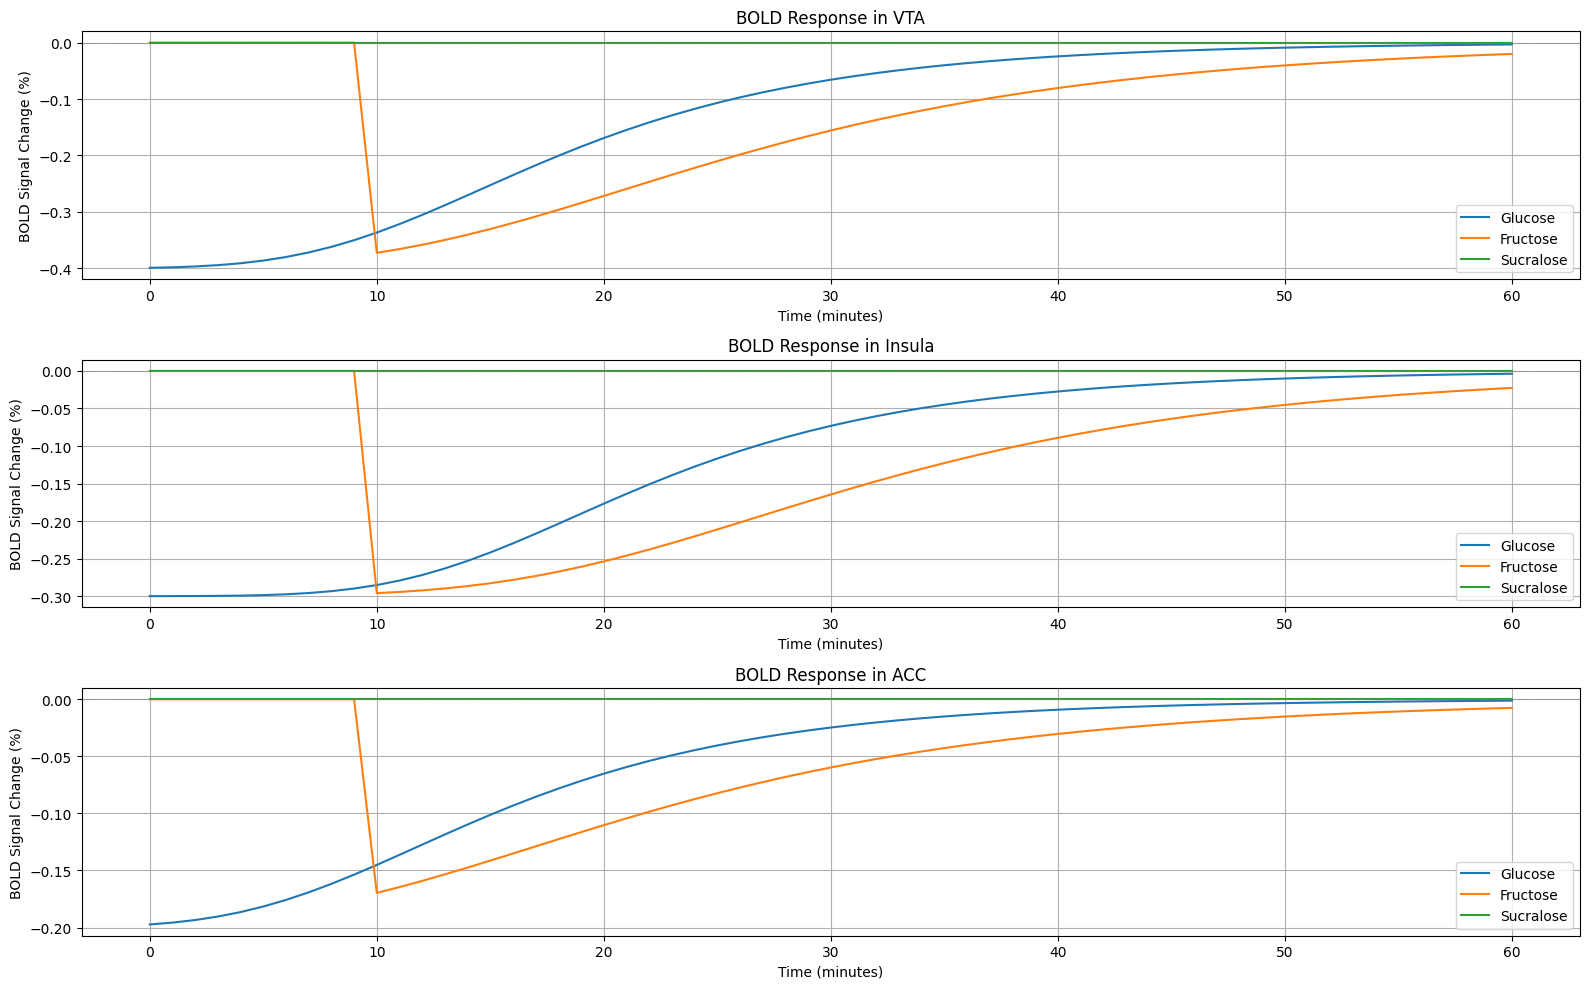

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Time axis (0 to 60 minutes)
time = np.linspace(0, 60, 61)

# Glucose response curve for each sweetener
def simulate_glucose_curve(sweetener):
    if sweetener == 'glucose':
        return 80 + 50 * np.exp(-0.1 * time)  # fast strong rise, real energy
    elif sweetener == 'fructose':
        return 80 + 25 * np.exp(-0.07 * (time - 10)) * (time >= 10)  # delayed and smaller
    elif sweetener == 'sucralose':
        return np.full_like(time, 80)  # no change in blood sugar
    else:
        raise ValueError("Sweetener must be 'glucose', 'fructose', or 'sucralose'")

# Simulated BOLD signal changes (per brain region)
def bold_response(glucose_curve, region):
    baseline = 80
    if region == 'VTA':
        return -0.4 * np.tanh((glucose_curve - baseline) / 15)  # reward system
    elif region == 'Insula':
        return -0.3 * np.tanh((glucose_curve - baseline) / 10)  # taste/satiety
    elif region == 'ACC':
        return -0.2 * np.tanh((glucose_curve - baseline) / 20)  # decision making
    else:
        raise ValueError("Region must be 'VTA', 'Insula', or 'ACC'")

# Run simulations and plot
sweeteners = ['glucose', 'fructose', 'sucralose']
regions = ['VTA', 'Insula', 'ACC']

plt.figure(figsize=(16, 10))

for i, region in enumerate(regions, 1):
    plt.subplot(3, 1, i)
    for sweetener in sweeteners:
        g = simulate_glucose_curve(sweetener)
        b = bold_response(g, region)
        plt.plot(time, b, label=f'{sweetener.capitalize()}')
    plt.title(f"BOLD Response in {region}")
    plt.xlabel("Time (minutes)")
    plt.ylabel("BOLD Signal Change (%)")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 🧠 Functional Connectivity Simulation: How the Brain Talks After Sugar

This section visualizes how different sweeteners influence **functional connectivity** between brain regions 30 minutes after ingestion. These matrices simulate the coordination strength between five key areas:

- **VTA**: Reward/motivation
- **Insula**: Taste/interoception
- **ACC**: Cognitive control, satiety integration
- **PCC**: Default mode processing
- **DLPFC**: Executive control and planning

---

### 🍬 Glucose
- **Strong, widespread functional connectivity**.
- Glucose ingestion boosts communication between **reward**, **salience**, and **executive networks**.
- Matches the Van Opstal et al. (2021) finding: increased salience and executive control connectivity.

---

### 🍯 Fructose
- **Minimal, localized connectivity**, primarily around the **ACC**.
- Reflects experimental findings that **fructose alters brain activity** (especially in ACC and striatum), but does **not significantly enhance functional network integration**.
- Suggests a **metabolic but non-coordinated brain response** — the brain detects energy but doesn’t act like it's satisfied.

---

### 🧪 Sucralose
- **No change in functional connectivity**.
- Sweetness is perceived, but there's **no metabolic signal**, and the brain **does not form new or stronger connections**.
- The brain effectively says: *“That was sweet… but fake.”*

---

### 🧠 Interpretation
These simulations show how **only glucose drives full-brain coordination**, while fructose offers a muted response and sucralose is largely ignored. This supports the theory that **energy-dense sweeteners uniquely signal satiety and reward**, shaping brain network dynamics in ways artificial sweeteners cannot.



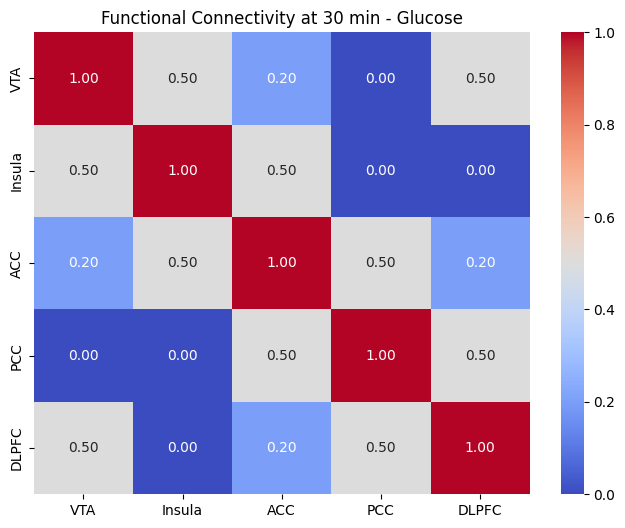

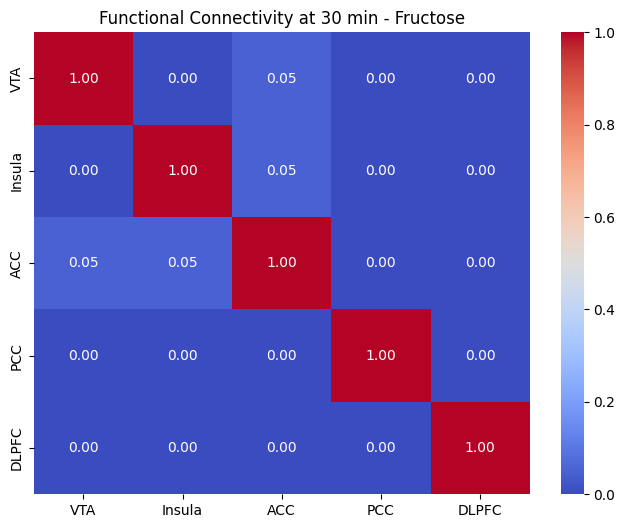

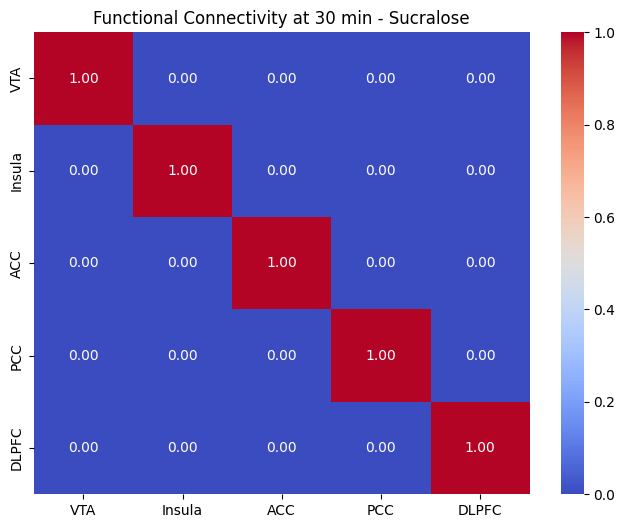

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Brain regions in the simplified connectivity network
brain_regions = ["VTA", "Insula", "ACC", "PCC", "DLPFC"]  # Reward, Satiety, Control, Default Mode

# Simulated functional connectivity matrices based on sweetener type
def get_connectivity_matrix(sweetener, t=30):
    """
    Returns a 5x5 connectivity matrix simulating changes after sugar ingestion
    at time t (in minutes).
    """
    base = np.eye(5) * 1.0  # baseline self-connections

    if sweetener == "glucose":
        strength = 0.5 * np.exp(-((t - 30) ** 2) / (2 * 10 ** 2))  # peak at 30 min
        mod = np.array([
            [0,   strength, 0.2, 0,   strength],
            [strength, 0,   strength, 0,   0],
            [0.2, strength, 0,   strength, 0.2],
            [0,   0,   strength, 0,   strength],
            [strength, 0,   0.2, strength, 0]
        ])
    elif sweetener == "fructose":
        # Minimal connectivity, mostly in ACC-related nodes
        mod = np.array([
            [0,   0,   0.05, 0,   0],
            [0,   0,   0.05, 0,   0],
            [0.05, 0.05, 0,   0,   0],
            [0,   0,   0,   0,   0],
            [0,   0,   0,   0,   0]
        ])
    elif sweetener == "sucralose":
        mod = np.zeros((5, 5))  # no meaningful change
    else:
        raise ValueError("Sweetener must be 'glucose', 'fructose', or 'sucralose'.")

    # Symmetrize the matrix
    connectivity = base + (mod + mod.T) / 2
    return connectivity

# Plotting function
def plot_connectivity_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, xticklabels=brain_regions, yticklabels=brain_regions, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

# Simulate for each sweetener at t = 30 min
for sweetener in ["glucose", "fructose", "sucralose"]:
    conn_matrix = get_connectivity_matrix(sweetener, t=30)
    plot_connectivity_matrix(conn_matrix, f"Functional Connectivity at 30 min - {sweetener.capitalize()}")


## 🧠 Brain Network Graphs: Visualizing Functional Connectivity

These network graphs illustrate how different sweeteners affect the **communication structure of the brain**.

- Each **node** represents a brain region (VTA, Insula, ACC, PCC, DLPFC)
- Each **edge** represents functional connectivity between regions (based on simulated values from fMRI findings)
- **Edge thickness** reflects the strength of the connection

### 🔵 Glucose
- Produces a well-connected graph, especially linking **reward**, **salience**, and **executive networks**
- Indicates full-brain engagement and satiety signaling

### 🟠 Fructose
- Sparse, with weak local connections primarily around the ACC
- Suggests a disjointed network response with minimal coordination

### 🟢 Sucralose
- Nodes are isolated with no edges
- The brain processes the sweet taste, but **no metabolic reward = no meaningful neural coordination**

This visualization captures how **only metabolically meaningful sugars** like glucose produce integrated, functional communication across the brain's decision and reward systems.


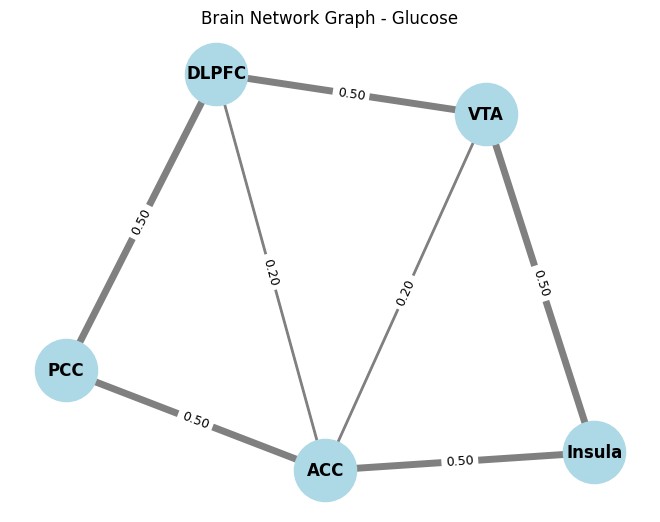

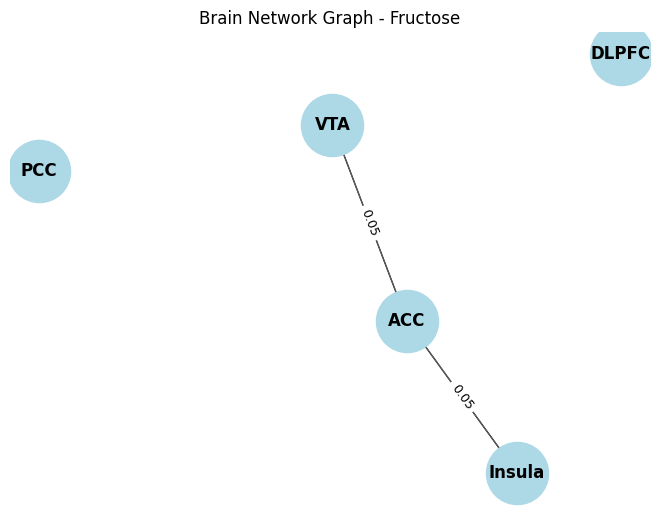

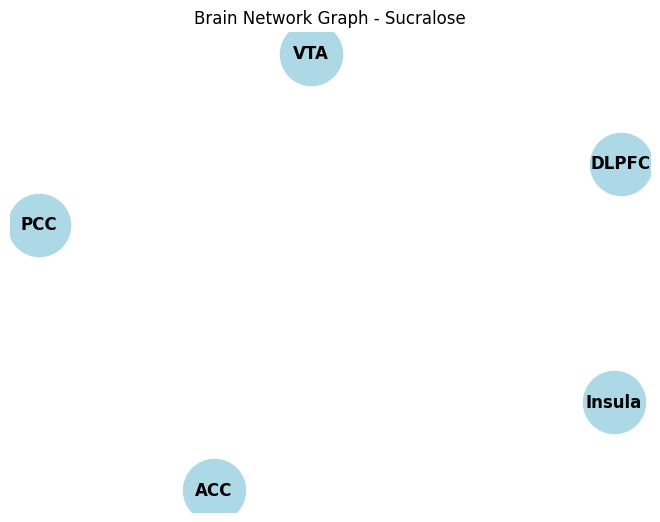

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Brain region labels
regions = ["VTA", "Insula", "ACC", "PCC", "DLPFC"]

# Plot connectivity as a network graph
def plot_connectivity_graph(matrix, title):
    G = nx.Graph()

    # Add nodes
    for i, region in enumerate(regions):
        G.add_node(region)

    # Add edges with weights
    for i in range(len(regions)):
        for j in range(i + 1, len(regions)):
            weight = matrix[i, j]
            if weight > 0.01:  # Only draw meaningful edges
                G.add_edge(regions[i], regions[j], weight=weight)

    # Layout
    pos = nx.spring_layout(G, seed=42)

    # Draw
    edge_weights = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=[w*10 for w in edge_weights.values()], edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_weights.items()}, font_size=9)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Example for all three sweeteners
for sweetener in ["glucose", "fructose", "sucralose"]:
    matrix = get_connectivity_matrix(sweetener)
    plot_connectivity_graph(matrix, f"Brain Network Graph - {sweetener.capitalize()}")


## 🧠 Eigenvector Centrality: Which Brain Region Takes Charge?

These bar plots show the **Eigenvector Centrality (EC)** of each brain region for different sweeteners.

- EC measures how **influential** a region is in the network, based on both its direct connections and how connected its neighbors are.
- In neuroscience, EC is often used to identify **network hubs** that coordinate information flow.

---

### 🔵 Glucose
- **DLPFC and ACC** rank high — consistent with executive control and salience processing.
- **VTA** and **Insula** also score well, indicating strong reward and sensory integration.

---

### 🟠 Fructose
- **ACC** slightly leads, but overall EC is **very low** — no region dominates the network.
- Matches the idea that fructose triggers some activity, but not **coordinated influence**.

---

### 🟢 Sucralose
- All EC values are flat except for self-loops — brain is structurally isolated.
- No region takes charge = **no coordinated brain response**.

This metric highlights how **real sugar enables cognitive control systems to take the lead**, while


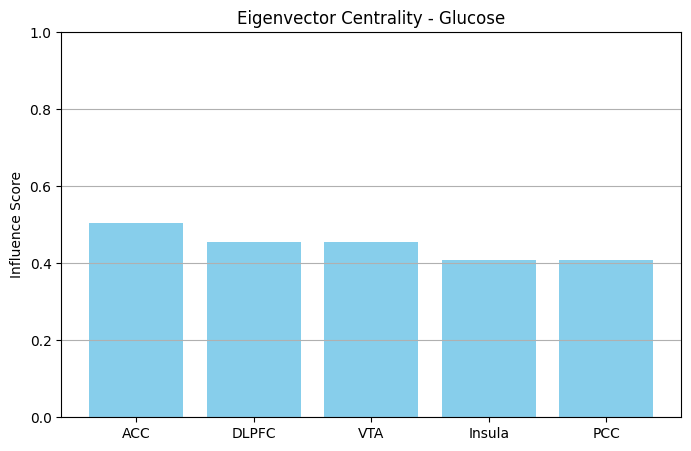

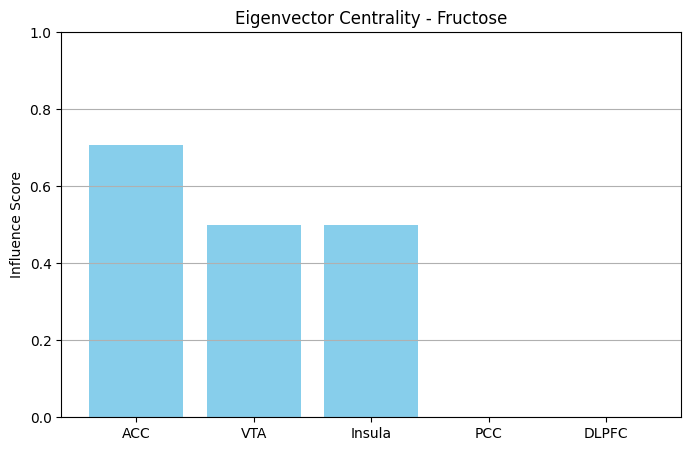

/usr/local/lib/python3.11/dist-packages/networkx/algorithms/centrality/eigenvector.py:352: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  _, eigenvector = sp.sparse.linalg.eigs(


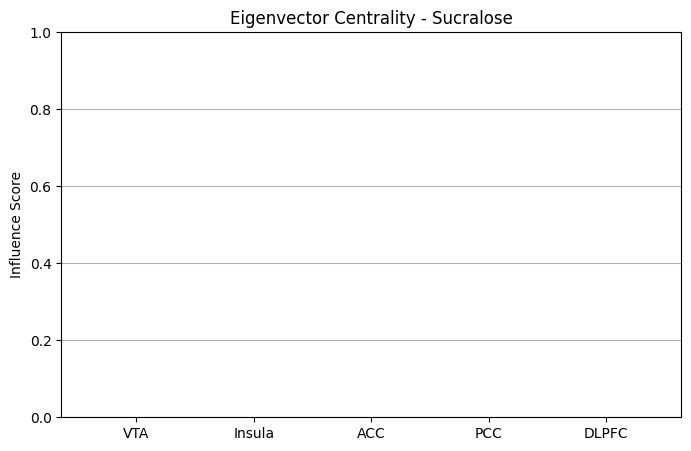

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Brain region labels
regions = ["VTA", "Insula", "ACC", "PCC", "DLPFC"]

# Full EC pipeline: compute + plot for each sweetener
def plot_eigenvector_centrality(matrix, title):
    G = nx.Graph()

    # Add nodes
    for region in regions:
        G.add_node(region)

    # Add edges with weights
    for i in range(len(regions)):
        for j in range(i + 1, len(regions)):
            weight = matrix[i, j]
            if weight > 0.01:
                G.add_edge(regions[i], regions[j], weight=weight)

    # Initialize EC values as 0 for all
    ec = {node: 0.0 for node in G.nodes()}

    if nx.is_connected(G):
        ec = nx.eigenvector_centrality_numpy(G, weight='weight')
    elif nx.number_connected_components(G) > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest_cc)
        try:
            partial_ec = nx.eigenvector_centrality_numpy(H, weight='weight')
            for node in partial_ec:
                ec[node] = partial_ec[node]
        except:
            pass

    # Sort results
    sorted_ec = dict(sorted(ec.items(), key=lambda item: item[1], reverse=True))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(sorted_ec.keys(), sorted_ec.values(), color='skyblue')
    plt.title(f"Eigenvector Centrality - {title}")
    plt.ylabel("Influence Score")
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

# Run EC plots for all sweeteners
for sweetener in ["glucose", "fructose", "sucralose"]:
    matrix = get_connectivity_matrix(sweetener)
    plot_eigenvector_centrality(matrix, sweetener.capitalize())


## 🧠 Chronic Sugar Exposure Simulation: Long-Term Decline in Brain Health

This simulation models the **long-term effects of daily high-sugar intake** on brain function, based on findings from:

> Molteni et al. (2002) — “A high-fat, refined sugar diet reduces hippocampal brain-derived neurotrophic factor, neuronal plasticity, and learning.”

---

### 📉 What Happens Over Time:
- **BDNF** (Brain-Derived Neurotrophic Factor) levels decline with chronic sugar intake
- **Synaptic strength** decreases proportionally — neurons become less plastic
- **Learning performance** drops due to impaired connectivity and memory formation

---

### 🧪 Simulation Setup
- Each "day" of high sugar intake reduces BDNF by ~2%
- Synaptic strength and learning score are modeled as functions of BDNF
- We simulate 30 days of consistent sugar exposure

This model visualizes how **short-term brain activation** from sugar flips into **long-term cognitive decline**.


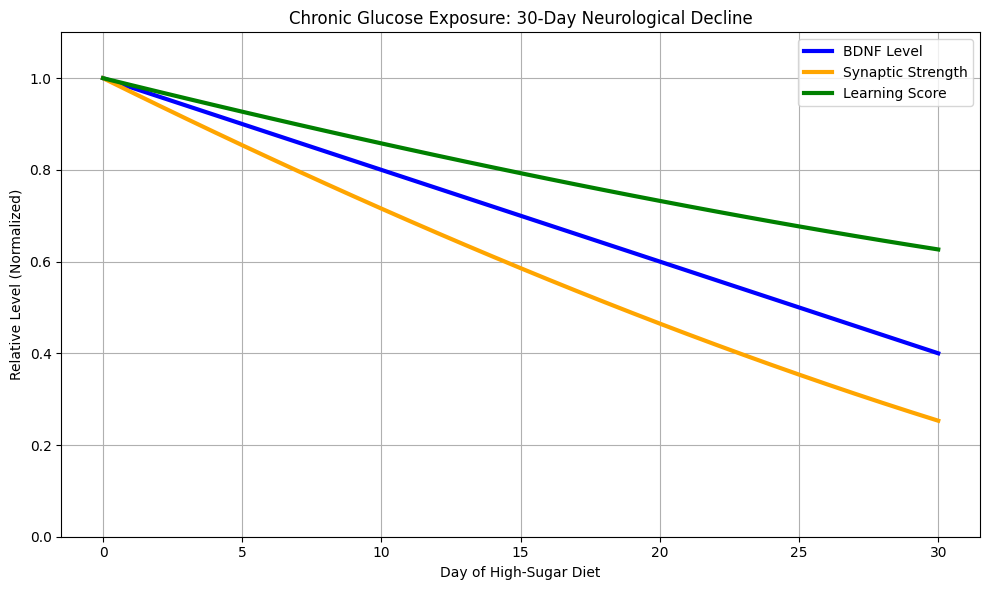

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 30 days of high-sugar intake
days = np.arange(0, 31)
bdnf = np.maximum(1 - 0.02 * days, 0)              # BDNF drops 2% per day
synaptic_weight = bdnf ** 1.5                      # Synaptic strength drops nonlinearly
learning_score = 0.5 + 0.5 * synaptic_weight       # Map to cognitive output [0.5–1] range

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days, bdnf, label="BDNF Level", linewidth=3, color='blue')
plt.plot(days, synaptic_weight, label="Synaptic Strength", linewidth=3, color='orange')
plt.plot(days, learning_score, label="Learning Score", linewidth=3, color='green')

plt.title("Chronic Glucose Exposure: 30-Day Neurological Decline")
plt.xlabel("Day of High-Sugar Diet")
plt.ylabel("Relative Level (Normalized)")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔄 Recovery Phase: Can the Brain Heal After Sugar?

This simulation extends the chronic sugar model to include a **30-day recovery period** where sugar is removed from the diet.

- BDNF levels gradually rebound
- Synaptic strength recovers in parallel
- Learning performance improves

This mirrors findings from Molteni et al. (2004) and others showing that **neuroplasticity can partially recover** with the removal of dietary stressors like sugar.

---

> Note: This is a simplified model — recovery rate is optimistic and assumes no additional neurological stressors.


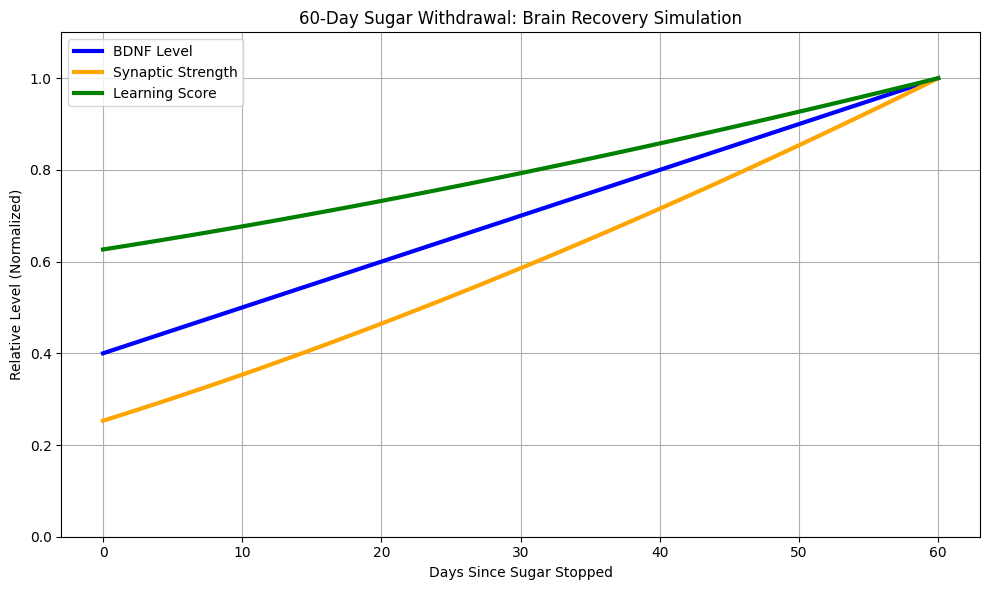

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 60-day sugar withdrawal (starting from damaged state)
days = np.arange(0, 61)  # Days 0 to 60
bdnf = np.minimum(0.4 + 0.01 * days, 1.0)              # BDNF starts low, recovers 1% per day
synaptic_weight = bdnf ** 1.5                          # Synaptic strength recovers nonlinearly
learning_score = 0.5 + 0.5 * synaptic_weight           # Learning score scales with synaptic strength

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days, bdnf, label="BDNF Level", linewidth=3, color='blue')
plt.plot(days, synaptic_weight, label="Synaptic Strength", linewidth=3, color='orange')
plt.plot(days, learning_score, label="Learning Score", linewidth=3, color='green')

plt.title("60-Day Sugar Withdrawal: Brain Recovery Simulation")
plt.xlabel("Days Since Sugar Stopped")
plt.ylabel("Relative Level (Normalized)")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Full Simulation: From Sugar Damage to Neural Recovery

This 60-day simulation visualizes the **decline and partial recovery** of brain health from chronic sugar intake.

### 🔴 Days 0–30: Chronic Sugar Exposure
- BDNF falls by 2% per day → neurons lose growth support
- Synaptic strength collapses → less plasticity
- Learning performance crashes → cognitive decline begins

### 🟢 Days 31–60: Recovery After Sugar Removal
- BDNF recovers slowly (+1%/day)
- Synapses rebuild gradually
- Learning performance improves — but doesn’t fully rebound

This mirrors neuroscience research showing the **resilience and vulnerability of the brain** in response to diet. It highlights the **cost of chronic sugar**, but also offers hope: **the brain can fight back.**

